In [1]:
from tensorflow.keras.applications import MobileNetV2

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, Sequential

In [3]:
img_width,img_height=256,256

model=MobileNetV2(weights='imagenet',
                include_top=False,
                input_shape=(img_height,img_width,3)
                )

9406464/9406464 [==============================] - 63s 7us/step


In [4]:
for layer in model.layers:
    layer.trainable=False

In [5]:
def add_layer_at_bottom(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_data_dir='training'
val_data_dir='validate'

In [8]:
from keras.layers.preprocessing.image_preprocessing import HORIZONTAL

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=45,
                                 width_shift_range=0.3,
                                 height_shift_range=0.3,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

val_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
batch_size=32

In [10]:
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=(img_height,img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

val_generator=val_datagen.flow_from_directory(val_data_dir,
                                              target_size=(img_height,img_width),
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 1315 images belonging to 2 classes.
Found 232 images belonging to 2 classes.


In [11]:
train_class_names = set()
num_train_samples=0
for i in train_generator.filenames:
    train_class_names.add(i.split('/')[0])
    num_train_samples+=1
print(num_train_samples)
train_class_names

1315


{'eczema\\434.jpeg',
 'eczema\\766.jpeg',
 'normal\\normal155.png',
 'eczema\\427.jpeg',
 'eczema\\605.jpeg',
 'eczema\\852.jpeg',
 'eczema\\920.jpeg',
 'eczema\\46.jpeg',
 'eczema\\956.jpeg',
 'eczema\\712.jpeg',
 'eczema\\706.jpeg',
 'eczema\\340.jpeg',
 'eczema\\438.jpeg',
 'eczema\\1094.jpeg',
 'eczema\\995.jpeg',
 'eczema\\455.jpeg',
 'eczema\\425.jpeg',
 'eczema\\358.jpeg',
 'eczema\\337.jpeg',
 'eczema\\795.jpeg',
 'eczema\\1096.jpeg',
 'eczema\\877.jpeg',
 'normal\\normal81.png',
 'eczema\\310.jpeg',
 'eczema\\831.jpeg',
 'eczema\\269.jpeg',
 'eczema\\771.jpeg',
 'eczema\\1087.jpeg',
 'eczema\\828.jpeg',
 'normal\\normal17.png',
 'eczema\\10.PNG',
 'eczema\\156.jpeg',
 'eczema\\148.jpeg',
 'eczema\\794.jpeg',
 'eczema\\888.jpeg',
 'eczema\\319.jpeg',
 'eczema\\844.jpeg',
 'eczema\\311.jpeg',
 'eczema\\1086.jpeg',
 'eczema\\442.jpeg',
 'eczema\\266.jpeg',
 'eczema\\611.jpeg',
 'normal\\s6.jpeg',
 'eczema\\245.jpeg',
 'eczema\\491.jpeg',
 'eczema\\54.jpeg',
 'eczema\\485.jpeg',
 

In [12]:
val_class_names = set()
num_val_samples=0
for i in val_generator.filenames:
    val_class_names.add(i.split('/')[0])
    num_val_samples+=1
print(num_val_samples)
val_class_names

232


{'eczema\\1100.jpeg',
 'eczema\\1101.jpeg',
 'eczema\\1102.jpeg',
 'eczema\\1103.jpeg',
 'eczema\\1104.jpeg',
 'eczema\\1105.jpeg',
 'eczema\\1106.jpeg',
 'eczema\\1107.jpeg',
 'eczema\\1108.jpeg',
 'eczema\\1109.jpeg',
 'eczema\\1110.jpeg',
 'eczema\\1111.jpeg',
 'eczema\\1112.jpeg',
 'eczema\\1113.jpeg',
 'eczema\\1114.jpeg',
 'eczema\\1115.jpeg',
 'eczema\\1116.jpeg',
 'eczema\\1117.jpeg',
 'eczema\\1118.jpeg',
 'eczema\\1119.jpeg',
 'eczema\\1120.jpeg',
 'eczema\\1121.jpeg',
 'eczema\\1122.jpeg',
 'eczema\\1123.jpeg',
 'eczema\\1124.jpeg',
 'eczema\\1125.jpeg',
 'eczema\\1126.jpeg',
 'eczema\\1127.jpeg',
 'eczema\\1128.jpeg',
 'eczema\\1129.jpeg',
 'eczema\\1130.jpeg',
 'eczema\\1131.jpeg',
 'eczema\\1132.jpeg',
 'eczema\\1133.jpeg',
 'eczema\\1134.jpeg',
 'eczema\\1135.jpeg',
 'eczema\\1136.jpeg',
 'eczema\\1137.jpeg',
 'eczema\\1138.jpeg',
 'eczema\\1139.jpeg',
 'eczema\\1140.jpeg',
 'eczema\\1141.jpeg',
 'eczema\\1142.jpeg',
 'eczema\\1143.jpeg',
 'eczema\\1144.jpeg',
 'eczema\\

In [13]:
num_classes=len(train_generator.class_indices)
print(num_classes)
FC_head=add_layer_at_bottom(model,
                            num_classes)

main_model=Model(inputs=model.input,
                 outputs=FC_head)

main_model.summary()

2
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 64, 64, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 65, 65, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 32, 32, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 32, 32, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 16, 16, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 16, 16, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 16, 16, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 16, 16, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 16, 16, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 16, 16, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 16, 16, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 16, 16, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 8, 8, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 8, 8, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 8, 8, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 8, 8, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [14]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [16]:
checkpoint = ModelCheckpoint("model_rec.h5",
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=2,
                          verbose=1,
                          restore_best_weights=True)

callbacks=[checkpoint,earlystop]

main_model.compile(loss='categorical_crossentropy',
                   optimizer=RMSprop(learning_rate=0.0015),
                   metrics=['accuracy'])

epochs=20

batch_size = 32

history = main_model.fit(train_generator,
                         steps_per_epoch=num_train_samples//batch_size,
                         epochs=epochs,
                         callbacks=callbacks,
                         validation_data=val_generator,
                         validation_steps=num_val_samples//batch_size)

Epoch 1/20
41/41 [==============================] - ETA: 0s - loss: 0.0846 - accuracy: 0.9805
Epoch 1: val_loss improved from inf to 0.27991, saving model to model_rec.h5
41/41 [==============================] - 151s 3s/step - loss: 0.0846 - accuracy: 0.9805 - val_loss: 0.2799 - val_accuracy: 0.9062
Epoch 2/20
41/41 [==============================] - ETA: 0s - loss: 0.0695 - accuracy: 0.9860
Epoch 2: val_loss improved from 0.27991 to 0.16233, saving model to model_rec.h5
41/41 [==============================] - 106s 3s/step - loss: 0.0695 - accuracy: 0.9860 - val_loss: 0.1623 - val_accuracy: 0.9330
Epoch 3/20
41/41 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.9899
Epoch 3: val_loss did not improve from 0.16233
41/41 [==============================] - 107s 3s/step - loss: 0.0344 - accuracy: 0.9899 - val_loss: 0.3880 - val_accuracy: 0.8973
Epoch 4/20
41/41 [==============================] - ETA: 0s - loss: 0.0337 - accuracy: 0.9836
Epoch 4: val_loss did not imp

1/1 [==============================] - 0s 429ms/step
[[0.03133859 0.9686614 ]]


'normal'

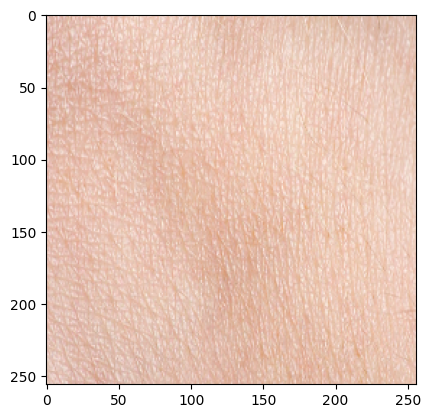

In [20]:
import cv2
out=['eczema',
 'normal']
img=cv2.imread("n1.PNG")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(256,256))
img=img/255.
import matplotlib.pyplot as plt
plt.imshow(img)
img=img.reshape(1,256,256,3)
import numpy as np
res=main_model.predict(img)
print(res)
out[np.argmax(res)]

In [22]:
!mkdir jsDir
!tensorflowjs_converter --input_format keras model_rec.h5 jsDir/